In [114]:
import torch
import importlib

import my_modules.nsclc
import my_modules.nsclc.nsclc_dataset
from my_modules.custom_models import *
importlib.reload(my_modules.nsclc.nsclc_dataset)
from my_modules.nsclc.nsclc_dataset import NSCLCDataset

Cache reset
Cache reset


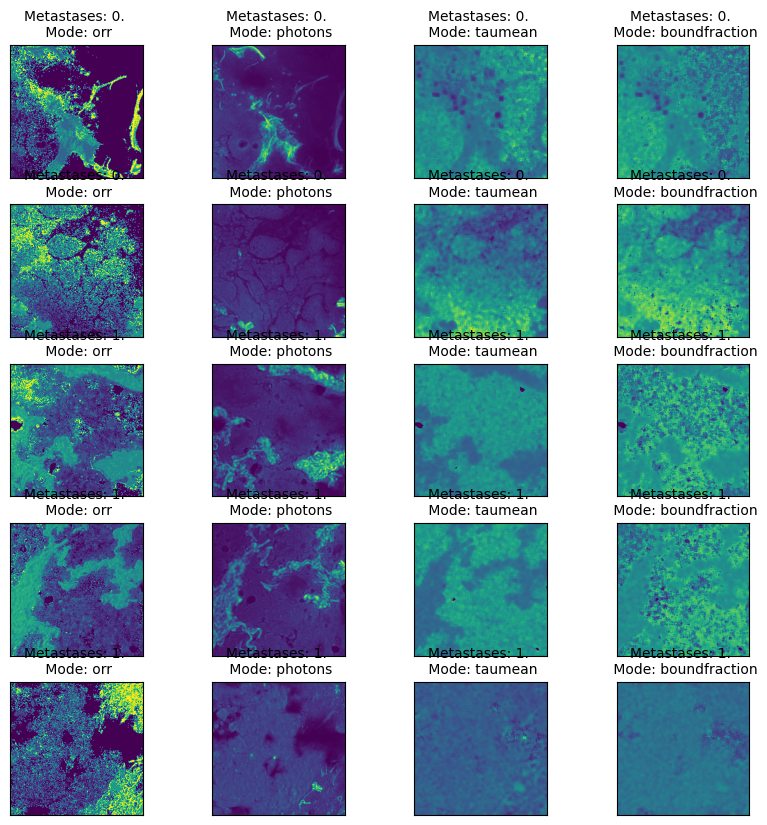

In [115]:
# Load dataset
data = NSCLCDataset('E:\\NSCLC Data - PMD', ['orr', 'photons', 'taumean', 'boundfraction'], label='M', mask_on=True)
data.normalize_channels_to_max()
data.augment()
data.show_random()

# Metastatic Potential Classifiers
### MLP

In [ ]:
# Testing on dataset
model = MLPNet(data.shape)
model.load_state_dict(
    torch.load("models/MLP Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### Parallel MLP

In [ ]:
# Testing on dataset
model = ParallelMLPNet(data.shape)
model.load_state_dict(
    torch.load("models/Parallel MLP_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### Regularized MLP

In [ ]:
# Testing on dataset
model = RegularizedMLPNet(data.shape)
model.load_state_dict(
    torch.load("models/Regularized MLP Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### Regularized Parallel MLP

In [ ]:
# Testing on dataset
model = RegularizedParallelMLPNet(data.shape)
model.load_state_dict(
    torch.load("models/Regularized Parallel MLP Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### CNN

In [ ]:
# Testing on dataset
model = CNNet(data.shape)
model.load_state_dict(
    torch.load("models/CN Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### Parallel CNN

In [ ]:
# Testing on dataset
model = ParallelCNNet(data.shape)
model.load_state_dict(
    torch.load("models/Parallel CN Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

### Regularized Parallel CNN

In [ ]:
# Testing on dataset
model = RegularizedParallelCNNet(data.shape)
model.load_state_dict(
    torch.load("models/Regularized Parallel CN Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth"))

model.eval()
correct = 0
data_out = []
data_pred = []
with torch.no_grad():
    for sample in data:
        out = model(sample[0].unsqueeze(0)).item()
        data_out.append(out)
        pred = np.round(out)
        data_pred.append(pred)
        correct += 1 if pred == sample[1].item() else 0
print(f'Accuracy over whole dataset: {100*correct / len(data):.2f}%')

## Results Summary for Image-based Classifiers
While the MLP-based networks showed some promising results (with the parallel MLPs reaching accuracies >80%), the parallel CNNs outperform all MLP-based networks and are of comparable weight to a fully-connected MLP through the use of kernels rather than dense layers. Interestingly, a basic CNN was the worst performer by a notable margin. This may be due to the increased level of complexity that the model must learn to detect relationships across dimensions, while not adding appropriate numbers of trainable parameters or increased data-size. Both parallel models performed excellently with accuracies >90%. The regularized parallel network only slightly outperforms the parallel network, but adds no new trainable parameters (and only 9KB to the model size) and should make performance generally more stable.

These models were all trained, evaluated, and tested originally on subsets of the entire dataset, but the tests shown here are across the entire dataset, meaning overfitting would be strongly reflected in the results. More robust checks for the best performers are below.

In [61]:
best_models = {'Parallel MLP': 
                   [ParallelMLPNet, 'models/Parallel MLP_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth'],
               'Regularized Parallel MLP':
                   [RegularizedParallelMLPNet, 'models/Regularized Parallel MLP Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth'],
               'Parallel CNN': 
                   [ParallelCNNet, 'models/Parallel CN Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth'],
               'Regualrized Parallel CNN': 
                   [RegularizedParallelCNNet, 'models/Regularized Parallel CN Net_Epochs-125_nsclc_Metastases_orr+photons+taumean+boundfraction_Augmented_Normalized.pth']}

### Trash in $\rightarrow$ Trash out
As a sanity check, we have pushed through a "random" trash dataset below. We expect that trash in should give trash out. If it does, that is not a strong indication of model efficacy -- that will be addressed next. If it doesn't however, that is a strong indication of model failure. 

In [62]:
def trash_in(model, trash_heap_size=500):
    _in = torch.rand(trash_heap_size, *model.input_size)
    trash_out = []
    model.eval()
    for trash in _in:
        _out = model(trash.unsqueeze(0)).item()
        trash_out.append(_out)
    return trash_out

In [64]:
for model_name, (model_class, model_path) in best_models.items():
    model = (model_class(data.shape))
    model.load_state_dict(torch.load(model_path))
    trash_out = trash_in(model, 500)
    print(f'Trash into {model_name} resulted in {100*sum(trash_out) / len(trash_out):.2f}% of outputs being positivley classified')

Trash into Parallel MLP resulted in 100.00% of outputs being positivley classified
Trash into Regularized Parallel MLP resulted in 93.87% of outputs being positivley classified
Trash into Parallel CNN resulted in 99.76% of outputs being positivley classified
Trash into Regualrized Parallel CNN resulted in 100.00% of outputs being positivley classified


In [108]:
for _ in data:
    pass

In [109]:
data.shared_y

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [110]:
torch.sum(data.shared_y)/len(data.shared_y)

tensor(0.1128)

In [111]:
data.features['Status (Mets/NM)'].iloc[[data.all_fovs[107] in slide for slide in data.fovs_by_slide].index(True)]

'METS'

### 5-Fold Cross Validation
To assess efficacy, We will take the best performing models from this group (parallel MLPs and parallel CNNs) and perform 5-Fold Cross Validation to obtain more robust measures of performance for these models. For each fold, we will score raw accuracy and ROC-AUC.

In [ ]:
from my_modules.model_learning import train_epoch, test_model
import matplotlib.pyplot as plt

In [ ]:
lengths = [int(0.2 * len(data)) for _ in range(5)]
data_folds = torch.utils.data.random_split(dataset=data, lengths=[133, 133, 133, 133, 133])
batch_size = 32
lr = 0.01
loss_fn = nn.BCELoss()
optimizer_fn = torch.optim.SGD

In [ ]:
for model_name, (model_class, model_path) in best_models.items():
    accuracy = []
    for fold, test_set in enumerate(data_folds):
        model = model_class(data.shape)
        train_sets = [data_folds[index] for index in range(5) if index != fold]
        train_set = torch.utils.data.ConcatDataset(train_sets)
        train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
        test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)
        optimizer = optimizer_fn(model.parameters(), lr=lr)
        
        model.train()
        running_loss = []
        if torch.cuda.is_available() and not next(model.parameters()).is_cuda:
            model.to(torch.device('cuda'))
        for epoch in range(125):
            model.train(True)
            loss = train_epoch(model, train_loader, loss_fn, optimizer)
            running_loss.append(loss)
        model.eval()
        correct = test_model(model, test_loader)
        accuracy.append(100*correct/len(test_loader.sampler))
        print(f'Accuracy for fold {fold+1}: {accuracy[-1]:.2f}%')
        plt.plot(running_loss)
        plt.show()
    print(f'Model average accuracy: {sum(accuracy)/len(accuracy):.2f}%')